In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics

In [3]:
#資料提取
df=pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
#資料轉型(float->int)
df['Diabetes_binary'] = df['Diabetes_binary'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')

df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [5]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


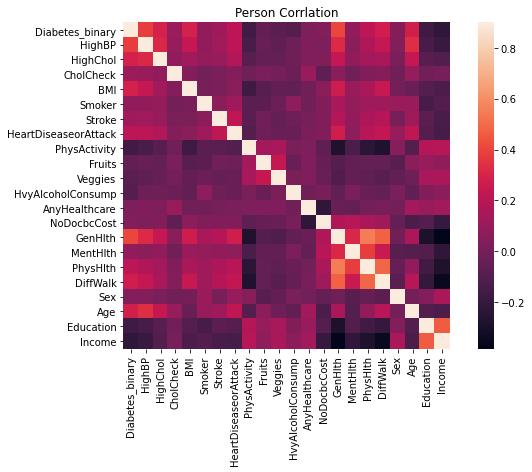

In [6]:
#heatmap correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),vmax=0.9,square=True)
plt.title('Person Corrlation')
plt.show()

In [9]:
#資料分割
X=df.drop('Diabetes_binary',axis=1)
y=df['Diabetes_binary']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(49484, 21)
(49484,)
(21208, 21)
(21208,)


In [10]:
#random forest
rf=RandomForestClassifier(random_state=1,max_features='sqrt',n_jobs=1,verbose=1)
%time rf.fit(X_train,y_train)
rf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 4.45 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


0.7393436439079593

In [11]:
#預測
y_pred=rf.predict(X_test)
print(y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[1 0 0 ... 0 0 1]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [12]:
#MSE&RMSE檢查
mse=metrics.mean_squared_error(y_test,y_pred)
print('Mean Squared Error:'+str(mse))
rmse=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:'+str(rmse))

Mean Squared Error:0.26065635609204074
Root Mean Squared Error:0.5105451557815829


[[7315 3166]
 [2362 8365]]


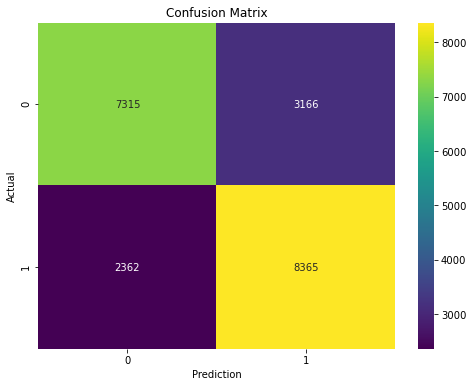

In [13]:
#混淆矩陣
matrix=metrics.confusion_matrix(y_test,y_pred)
print(matrix)

#熱力圖矩陣
plt.figure(figsize=(8,6))
sns.heatmap(matrix,annot=True,fmt='.0f',cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [14]:
#分類結果
report=metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.70      0.73     10481
           1       0.73      0.78      0.75     10727

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



In [15]:
#檢查特徵重要性
feature=pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature)

BMI                     0.171182
Age                     0.126768
GenHlth                 0.110904
Income                  0.081662
HighBP                  0.070832
PhysHlth                0.068117
Education               0.057663
MentHlth                0.051692
HighChol                0.041642
Smoker                  0.029195
Fruits                  0.028618
Sex                     0.026959
DiffWalk                0.025085
PhysActivity            0.022910
Veggies                 0.021899
HeartDiseaseorAttack    0.019261
NoDocbcCost             0.011976
Stroke                  0.010055
HvyAlcoholConsump       0.009853
AnyHealthcare           0.007453
CholCheck               0.006274
dtype: float64


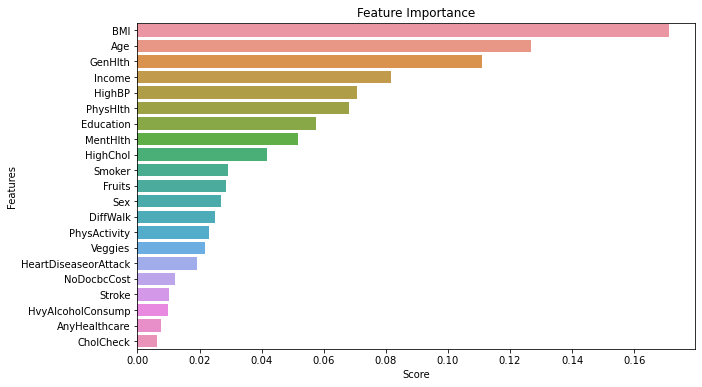

In [16]:
#可視化特徵
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [18]:
#視覺化
df.Diabetes_binary[df['Diabetes_binary'] == 0] = 'No Diabetes'
df.Diabetes_binary[df['Diabetes_binary'] == 1] = 'Diabetes'

df.HighBP[df['HighBP'] == 0] = 'No High'
df.HighBP[df['HighBP'] == 1] = 'High BP'

df.HighChol[df['HighChol'] == 0] = 'No High Cholesterol'
df.HighChol[df['HighChol'] == 1] = 'High Cholesterol'

df.CholCheck[df['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df.CholCheck[df['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df.Smoker[df['Smoker'] == 0] = 'No'
df.Smoker[df['Smoker'] == 1] = 'Yes'

df.Stroke[df['Stroke'] == 0] = 'No'
df.Stroke[df['Stroke'] == 1] = 'Yes'

df.HeartDiseaseorAttack[df['HeartDiseaseorAttack'] == 0] = 'No'
df.HeartDiseaseorAttack[df['HeartDiseaseorAttack'] == 1] = 'Yes'

df.PhysActivity[df['PhysActivity'] == 0] = 'No'
df.PhysActivity[df['PhysActivity'] == 1] = 'Yes'

df.Fruits[df['Fruits'] == 0] = 'No'
df.Fruits[df['Fruits'] == 1] = 'Yes'

df.Veggies[df['Veggies'] == 0] = 'No'
df.Veggies[df['Veggies'] == 1] = 'Yes'

df.HvyAlcoholConsump[df['HvyAlcoholConsump'] == 0] = 'No'
df.HvyAlcoholConsump[df['HvyAlcoholConsump'] == 1] = 'Yes'

df.AnyHealthcare[df['AnyHealthcare'] == 0] = 'No'
df.AnyHealthcare[df['AnyHealthcare'] == 1] = 'Yes'

df.NoDocbcCost[df['NoDocbcCost'] == 0] = 'No'
df.NoDocbcCost[df['NoDocbcCost'] == 1] = 'Yes'

df.GenHlth[df['GenHlth'] == 1] = 'Excellent'
df.GenHlth[df['GenHlth'] == 2] = 'Very Good'
df.GenHlth[df['GenHlth'] == 3] = 'Good'
df.GenHlth[df['GenHlth'] == 4] = 'Fair'
df.GenHlth[df['GenHlth'] == 5] = 'Poor'

df.DiffWalk[df['DiffWalk'] == 0] = 'No'
df.DiffWalk[df['DiffWalk'] == 1] = 'Yes'

df.Sex[df['Sex'] == 0] = 'Female'
df.Sex[df['Sex'] == 1] = 'Male'

df.Education[df['Education'] == 1] = 'Never Attended School'
df.Education[df['Education'] == 2] = 'Elementary'
df.Education[df['Education'] == 3] = 'Junior High School'
df.Education[df['Education'] == 4] = 'Senior High School'
df.Education[df['Education'] == 5] = 'Undergraduate Degree'
df.Education[df['Education'] == 6] = 'Magister'

df.Income[df['Income'] == 1] = 'Less Than $10,000'
df.Income[df['Income'] == 2] = 'Less Than $10,000'
df.Income[df['Income'] == 3] = 'Less Than $10,000'
df.Income[df['Income'] == 4] = 'Less Than $10,000'
df.Income[df['Income'] == 5] = 'Less Than $35,000'
df.Income[df['Income'] == 6] = 'Less Than $35,000'
df.Income[df['Income'] == 7] = 'Less Than $35,000'
df.Income[df['Income'] == 8] = '$75,000 or More'
df.head()

<ipython-input-18-19e2d09ffa9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HighBP[df['HighBP'] == 0] = 'No High'
<ipython-input-18-19e2d09ffa9b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HighChol[df['HighChol'] == 0] = 'No High Cholesterol'
<ipython-input-18-19e2d09ffa9b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HighChol[df['HighChol'] == 1] = 'High Cholesterol'
<ipython-input-18-19e2d09ffa9b>:11: SettingW

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,26,No,No,No,Yes,No,...,Yes,No,Good,5,30,No,Male,4,Magister,"$75,000 or More"
1,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,26,Yes,Yes,No,No,Yes,...,Yes,No,Good,0,0,No,Male,12,Magister,"$75,000 or More"
2,No Diabetes,No High,No High Cholesterol,Cholesterol Check in 5 Years,26,No,No,No,Yes,Yes,...,Yes,No,Excellent,0,10,No,Male,13,Magister,"$75,000 or More"
3,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28,Yes,No,No,Yes,Yes,...,Yes,No,Good,0,3,No,Male,11,Magister,"$75,000 or More"
4,No Diabetes,No High,No High Cholesterol,Cholesterol Check in 5 Years,29,Yes,No,No,Yes,Yes,...,Yes,No,Very Good,0,0,No,Female,8,Undergraduate Degree,"$75,000 or More"
